In [33]:
%%html
<script src="https://kit.fontawesome.com/751ade44c1.js" crossorigin="anonymous"></script>

<style>
:root {
    --red: #d9534f;
    --yellow: #f0ad4e;
    --green: #5cb85c;
    --blue: #0275d8;
    --light-blue: #5bc0de;
    --dark-blue: #073b4c;
    --purple: #6A4C93;
}
    
.important {
    color: var(--yellow);
}

.optional {
    color: var(--green);
}
</style>


# <i class="fas fa-circle exercise"></i> Geometric transformations
<span class="badge badge-pill important-bg">exercise</span><span class="badge badge-pill badge-dark">notebook</span>


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np



## Geometric Transformations

In this exercise, you will create  and apply linear geometric transformations using both the homogeneous and Euclidean representations. We cover the following topics:

* Rotations and translations using homogeneous coordinates.


We use the following helper functions for making the visualisation easier. Feel free to study the code:


In [4]:

# Import function to setup plot and display vectors 

from show_vectors import show_vectors
from  show_points import show_points


ModuleNotFoundError: No module named 'show_vectors'

In [5]:
def show_vectors(vectors, title="Vectors", origin=(0, 0)):
    """Helper that displays vectors using Matplotlib. 
    
    The details are not important for understanding the course material."""
    rows, cols = vectors.shape

    for i in range(0, cols):
        xs = [origin[0], vectors[0, i]]
        ys = [origin[1], vectors[1, i]]
        plt.plot(xs, ys, "-", linewidth=2)
    
    config_plot(title, vectors, 'v')

def show_points(points, title="Points"):
    """Helper that displays points using Matplotlib. 
    
    The details are not important for understanding the course material."""
    rows, cols = points.shape

    for i in range(0, cols):
        xs = points[0, i]
        ys = points[1, i]
        plt.plot(xs, ys, "o", linewidth=2)
    
    config_plot(title, points, 'p')

def config_plot(title, data, data_type):
    """Setup plot layout. This is purely for making the plots easier to read.
    
    The details are not important for understanding the course material.
    """
    rows, cols = data.shape
    
    plt.title(title)
    plt.grid(b=True, which="major")
    plt.legend([f'{data_type}{i+1}' for i in range(cols)])
    plt.axis('scaled')
    plt.plot(0, 0, "ok")

    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    
    max_values = 1.3 * np.max(abs(data.T), axis = 0)
    plt.xlim([-max_values[0], max_values[0]])
    plt.ylim([-max_values[1], max_values[1]])
    
    plt.show()


The  rotation matrix ($R$) which rotates a 2D point around the origin with angle $\theta$  is given by:

$$R = \left[
	\begin{array}{r r}
		\cos(\theta) & -\sin(\theta)\\
		\sin(\theta) & \cos(\theta)
	\end{array}
\right],$$


### <i class="fas fa-thermometer-quarter important"></i> Task (A)
1. **Create rotation matrices:** Implement the function `get_2d_rotation_matrix()` below which, given an input angle
`theta` (in radians) returns the rotation matrix `R`:


In [8]:

def get_2d_rotation_matrix(theta):
    """Return a rotation matrix for the specified input angle theta."""
    rotationMatrix = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    return np.transpose(rotationMatrix)


array([[ 0.15425145,  0.98803162],
       [-0.98803162,  0.15425145]])

1. **Test the function:** Test the implementation  by rotating the vector $[0, 1]^T$  with 
different values of $\theta$: $0, \pi/2, \pi, 1.5\pi, 2\pi$. Show that the rotated vectors are respectively $[0, 1]^T$, $[-1, 0]^T$,$[-1, -1]^T$, $[1, -1]^T$ and $[0, 1]^T$. 


In [15]:
angles = [0 ,math.pi/2, math.pi, 3*math.pi/2, 2*math.pi]
vector = np.array([[0], [1]])

# Your code here:
for angle in angles:
    #theta = np.radians(angle)
    rotationMatrix = get_2d_rotation_matrix(angle)
    rotatedVector = np.dot(rotationMatrix, vector)
    print(rotatedVector)

[[0.]
 [1.]]
[[-1.000000e+00]
 [ 6.123234e-17]]
[[-1.2246468e-16]
 [-1.0000000e+00]]
[[ 1.0000000e+00]
 [-1.8369702e-16]]
[[2.4492936e-16]
 [1.0000000e+00]]


1. **Rotate multiple vectors:** (a)  Rotate the column vectors in $V_1 = \begin{bmatrix} 1 &  1& -1 &-1\\ 1& -1& -1&  1 \end{bmatrix} $ in one matrix operation (no iteration).  
(b) Show both the original and
transformed vectors using the `show_vectors` function. 
(c) Explain the transformation of the points of V_1 in terms of the column vectors of R


C:\Users\mikke\AppData\Local\Temp\ipykernel_22664\745669554.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="major")


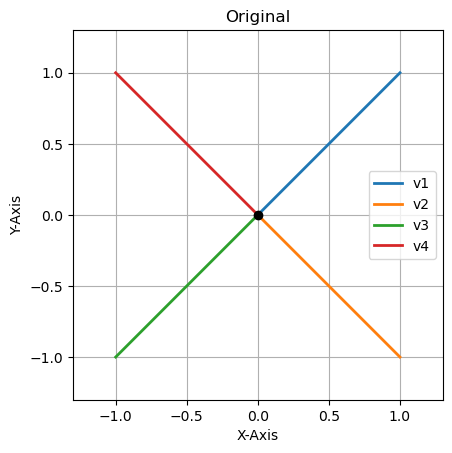

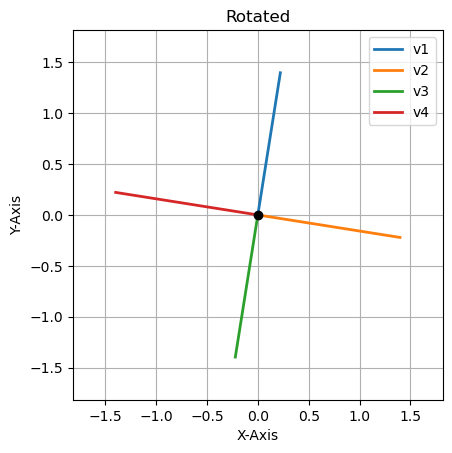

In [19]:
import matplotlib.pyplot as plt
R = get_2d_rotation_matrix(math.pi/5) # Get rotation matrix
# Create matrix of sample vectors
V1 = np.array([[ 1,  1, -1 ,-1 ],
               [ 1, -1, -1,  1 ]], dtype=np.float64)

# Your code here:
rotatedVector = np.dot(R, V1)

show_vectors(V1, "Original")
show_vectors(rotatedVector, "Rotated")

### Manual translation
<i class="fas fa-thermometer-quarter optional"></i>
(a) Translate the  the matrix p1  by   $(-2, -1)$  where $p1 =\begin{bmatrix} 1 & -1 & 2 & -2\\
              0 & -1 & 2 & -1 \end{bmatrix}$ and each column is considered a separate point. 
(b) Show both the original and transformed vectors using the `show_vectors` function.


C:\Users\mikke\AppData\Local\Temp\ipykernel_22664\745669554.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="major")


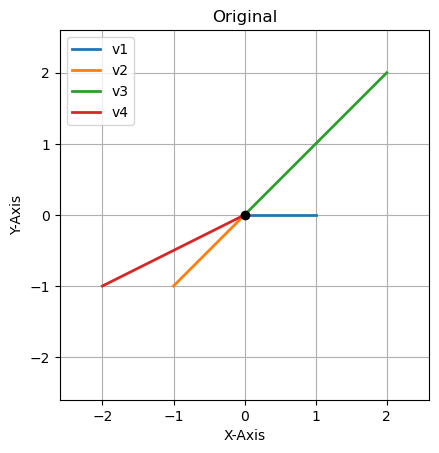

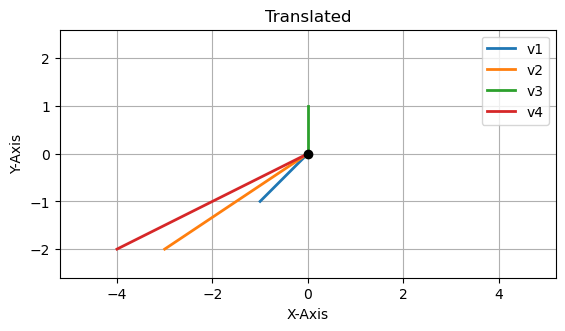

In [22]:
# Test points
p1 = np.array([[ 1, -1, 2, -2 ],
               [ 0, -1, 2, -1 ]], dtype=np.float64)
# Translation vector
t = np.array([[-2], [-1]], dtype=np.float64)

# Your code here:
translatedMatrix = p1 + t
show_vectors(p1, "Original")
show_vectors(translatedMatrix, "Translated")

## Homogeneous coordinates
 A  'similarity transformation' is a simplified affine transformation that only performs  rotation and translation. The similarity transformation is described by 3 parameters, the rotation angle ($\theta$) and two translation components  ($\Delta x$ and $\Delta y$)


The 2D similarity transformation using homegeneous coordinates is consequently :

$$
T=\begin{bmatrix}\cos\theta&-\sin\theta & x_t\\\sin\theta& \cos\theta & y_t\\ 0&0&1\end{bmatrix}
$$

Transformation of (homegeneous) coordinates is consequently

$$
\begin{bmatrix}x'\\ y'\\1\end{bmatrix} = T\begin{bmatrix}x\\ y\\1\end{bmatrix}.
$$

 Define the functions `to_homogeneous` (that map Euclidean coordinates to homogeneous coordinate) and `to_euclidean`  (that does the reverse) .

### <i class="fas fa-thermometer-half important"></i> Task(B)
1. Study the functions `to_homogeneous` and `to_euclidean` below. You will need them in the subseqent tasks.


In [37]:
def to_homogeneous(points):
    """Transform points to homogeneus coordinates."""
    return np.vstack((points, np.ones((1, points.shape[1]))))

def to_euclidean(points):
    """Transform homogeneus points to euclidean points."""
    return points[:2] / points[2]


2. Implement the function `get_2d_rt_matrix`. RENAME Isimilarity matrix .... which given a rotation
angle `theta`  and 2D translation vector `t` returns the similarity matrix ($3 \times 3$)


In [48]:
def get_2d_rt_matrix(theta, t):
    """Combines a rotation by angle theta and a translation by t=(x, y). 
    Returns the resulting transformation matrix."""
    print(t)
    T = np.transpose([[np.cos(theta), np.sin(theta), 0], [-np.sin(theta), np.cos(theta), 0], [t[0], t[1], 1]])
    return T


1. **Transform points:**  (a) Create a similarity matrix S  using `get_2d_rt_matrix`. (b) Transform  the points V1 using S.   Recall the points in V_1 are in Eucidean coordinates. Experiment with different values of `theta` and `t`. ( (d) Linear transformations are not commutative but does the similarity transformation above rotate and then translate or translate first and then rotate? use the 'show_points' to argue this. 


[1, 2]


C:\Users\mikke\AppData\Local\Temp\ipykernel_22664\745669554.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="major")


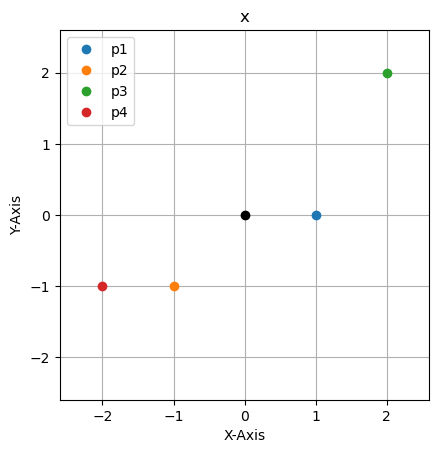

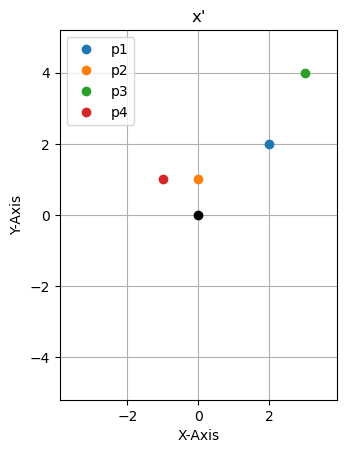

In [52]:
# Your code here:
S = get_2d_rt_matrix(0, [1, 2])
xm = to_euclidean(np.dot(S, to_homogeneous(p1)))

# Show the points for testing
show_points(p1, "x")
show_points(xm, "x'")


   **Combining transformations:** :Linear transformations can be combined through the sequential matrix multiplication in the right order eg. the transformation T  $$T = T_nT_{n-1}\cdots T_{1}$$ is composed the matrices $T_1,\cdots , T_n$) by first applying $T_1$ then $T_2$ until $T_n$. 
   
1. Create a transformation matrix $T_{rt} = RT$ that  performs a  translation followed by a rotation by creating two separate transformation
matrices $R$ and $T$ .
 2. Transform the points  `p1` using the
new matrix.
3. How are the points p1 transformed when the order if R and T are reversed


C:\Users\mikke\AppData\Local\Temp\ipykernel_22664\745669554.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="major")


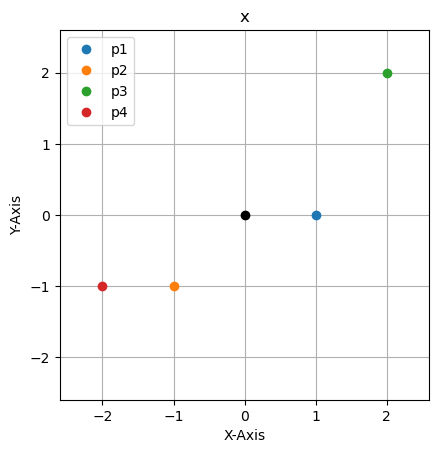

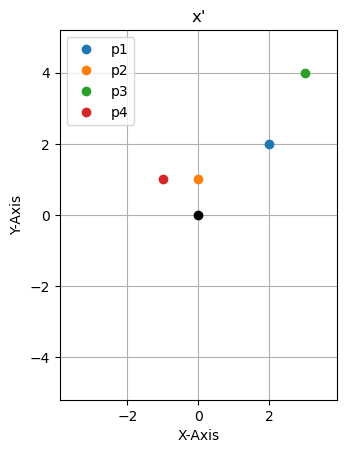

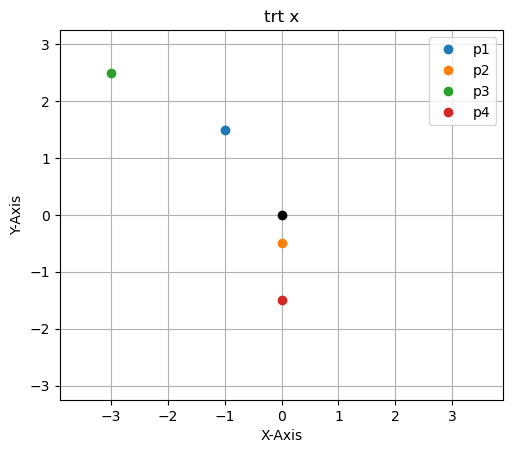

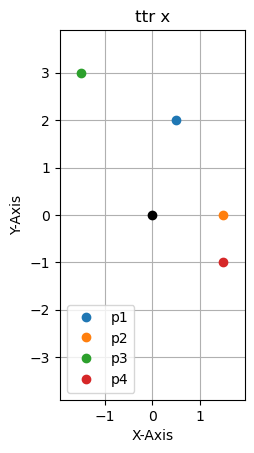

In [59]:
# Your code here:
T = [[0.5], [1]]
R = get_2d_rotation_matrix(math.pi/2)
def Trt(m):
    return np.dot(R, (T + m))

def Ttr(m):
    return T + np.dot(R, m)

# For testing
show_points(p1, "x")
show_points(xm, "x'")
show_points(Trt(p1), "trt x")
show_points(Ttr(p1), "ttr x")
